In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detector import ReceiptDetector
from process import ImageProcessor


TypeError: Invalid shape (4, 1, 2) for image data

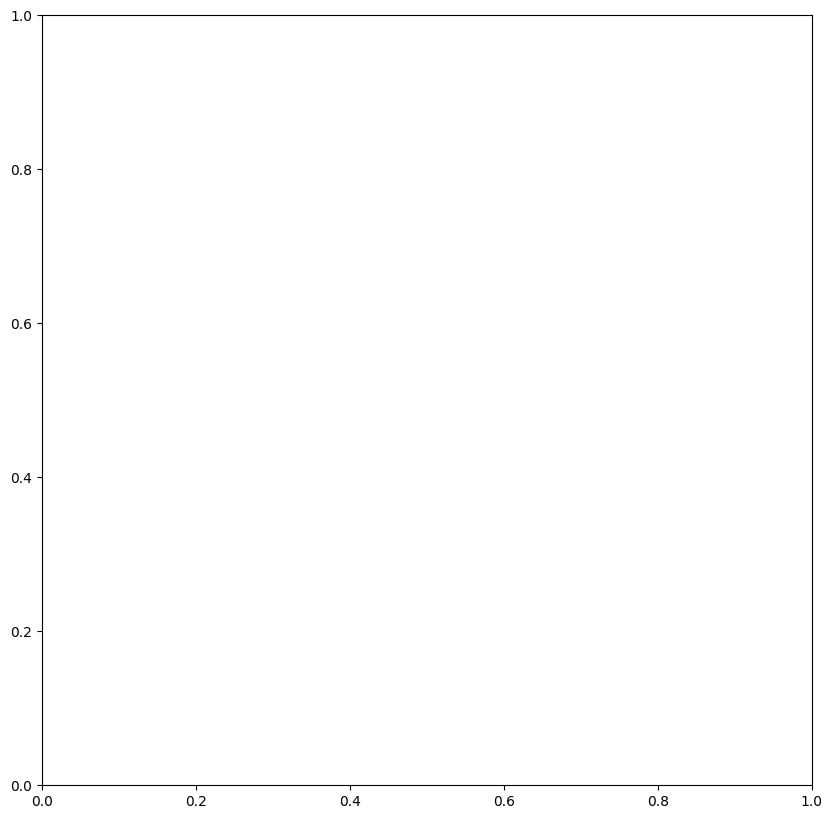

In [57]:
if __name__ == "__main__":
    image_processor = ImageProcessor()
    receipt_detector = ReceiptDetector()

    file_name = "/home/marceli/Receipt/project/data/photos/curve_2.jpg"
    image = image_processor.load_image(file_name)
    resize_ratio = 500 / image.shape[0]
    original = image.copy()
    image = image_processor.opencv_resize(image, resize_ratio)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get rid of noise with Gaussian Blur filter
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    dilated = cv2.dilate(blurred, rectKernel)

    # Detect white regions
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    edged = cv2.Canny(dilated, 100, 200, apertureSize=3)

    # Detect all contours in Canny-edged image
    contours, hierarchy = cv2.findContours(
        edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE
    )
    largest_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    receipt_contour = receipt_detector.get_receipt_contour(largest_contours)

    # to demonstrate the impact of contour approximation, let's loop
    # over a number of epsilon sizes
    # (x, y, w, h) = cv2.boundingRect(largest_contours[0])

    # peri = cv2.arcLength(receipt_contour, True)
    # for eps in np.linspace(0.001, 0.05, 10):
    #     approx = cv2.approxPolyDP(receipt_contour, eps * peri, True)
    #     output = image.copy()
    #     cv2.drawContours(output, [approx], -1, (0, 255, 0), 3)
    #     text = "eps={:.4f}, num_pts={}".format(eps, len(approx))
    #     cv2.putText(
    #         output,
    #         text,
    #         (x, y - 15),
    #         cv2.FONT_HERSHEY_SIMPLEX,
    #         0.9,
    #         (0, 255, 0),
    #         2,
    #     )
    #     if len(approx) <= 4:
    #         break

    scanned = receipt_detector.wrap_perspective(
        original.copy(),
        receipt_detector.contour_to_rect(receipt_contour, resize_ratio),
    )
    
    # Konwersja z formatu BGR na RGB
    scanned_rgb = cv2.cvtColor(scanned, cv2.COLOR_BGR2RGB)

    
    plt.figure(figsize=(16,10))
    plt.imshow(receipt_contour)
    

    plt.show()

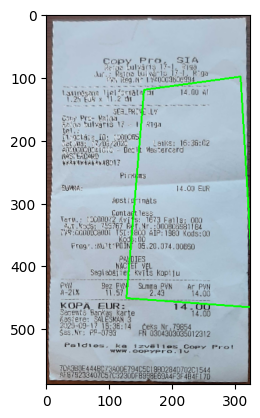

In [63]:
# Narysowanie konturu na obrazie
a = cv2.drawContours(scanned_rgb, [receipt_contour], -1, (0, 255, 0), 2)
plt.imshow(a)